In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'/Users/teomeriggi/Documents/Instacart Basket Analysis'

In [5]:
customers_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merge.pkl'))

#2. Based on the provided dataset, the following columns may contain Personally Identifiable Information (PII):

user_id: This is an identifier assigned to each user, which could potentially be linked to personal information.
First Name: The first name of the customer.
Surname: The last name or surname of the customer.
Gender: The gender of the customer.
STATE: The state where the customer resides.
Age: The age of the customer.
date_joined: The date when the customer joined the platform.
n_dependants: The number of dependants the customer has.
fam_status: The family status or marital status of the customer.
income: The income level of the customer.
These columns may contain personal information that can identify individuals. It's important to handle and protect this information with appropriate security measures and adhere to data privacy regulations and best practices when working with such data.

In [6]:
# Create a regional segmentation of the data

def create_region_column(customers_ords_prods_merge):
    state_to_region = {
        'Connecticut': 'Northeast',
        'Maine': 'Northeast',
        'Massachusetts': 'Northeast',
        'New Hampshire': 'Northeast',
        'New Jersey': 'Northeast',
        'New York': 'Northeast',
        'Pennsylvania': 'Northeast',
        'Rhode Island': 'Northeast',
        'Vermont': 'Northeast',
        'Illinois': 'Midwest',
        'Indiana': 'Midwest',
        'Iowa': 'Midwest',
        'Kansas': 'Midwest',
        'Michigan': 'Midwest',
        'Minnesota': 'Midwest',
        'Missouri': 'Midwest',
        'Nebraska': 'Midwest',
        'North Dakota': 'Midwest',
        'Ohio': 'Midwest',
        'South Dakota': 'Midwest',
        'Wisconsin': 'Midwest',
        'Alabama': 'South',
        'Arkansas': 'South',
        'Delaware': 'South',
        'Florida': 'South',
        'Georgia': 'South',
        'Kentucky': 'South',
        'Louisiana': 'South',
        'Maryland': 'South',
        'Mississippi': 'South',
        'North Carolina': 'South',
        'Oklahoma': 'South',
        'South Carolina': 'South',
        'Tennessee': 'South',
        'Texas': 'South',
        'Virginia': 'South',
        'West Virginia': 'South',
        'Alaska': 'West',
        'Arizona': 'West',
        'California': 'West',
        'Colorado': 'West',
        'Hawaii': 'West',
        'Idaho': 'West',
        'Montana': 'West',
        'Nevada': 'West',
        'New Mexico': 'West',
        'Oregon': 'West',
        'Utah': 'West',
        'Washington': 'West',
        'Wyoming': 'West'
    }
    
    customers_ords_prods_merge['Region'] = customers_ords_prods_merge['STATE'].map(state_to_region)
    return customers_ords_prods_merge
    

In [7]:
create_region_column(customers_ords_prods_merge)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,reordered,_merge,price_range,mean_order_number,max_order,loyalty_flag,mean_price,spending_flag,order_frequency_flag,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,0,both,Mid-range product,17.072954,8,New customer,9.000,Low spender,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,1,both,Mid-range product,17.072954,8,New customer,9.000,Low spender,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,1,both,Mid-range product,17.072954,8,New customer,9.000,Low spender,Regular customer,Midwest
3,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,...,0,both,Mid-range product,17.072954,5,New customer,7.975,Low spender,Non-frequent customer,West
4,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,...,1,both,Mid-range product,17.072954,5,New customer,7.975,Low spender,Non-frequent customer,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,49635,Jeremy,Robbins,Male,Hawaii,62,2020-04-01,3,married,168639,...,0,both,Mid-range product,15.602964,3,New customer,12.300,High spender,Frequent customer,West
999996,135902,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,...,0,both,Mid-range product,17.768070,8,New customer,8.575,Low spender,Frequent customer,Midwest
999997,135902,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,...,0,both,Mid-range product,16.924344,8,New customer,8.575,Low spender,Frequent customer,Midwest
999998,135902,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,...,1,both,Mid-range product,16.924344,8,New customer,8.575,Low spender,Frequent customer,Midwest


In [8]:
#Determine whether there’s a difference in spending habits between the different U.S. regions
# Cross the Region variable with the Spending_Flag variable
cross_tab = pd.crosstab(customers_ords_prods_merge['Region'], customers_ords_prods_merge['spending_flag'])



In [9]:
# Calculate the percentage of customers in each region who are high spenders
cross_tab['High Spenders %'] = cross_tab['High spender'] / (cross_tab['Low spender'] + cross_tab['High spender']) * 100


In [10]:
# Display the cross-tabulation table
print(cross_tab)

spending_flag  High spender  Low spender  High Spenders %
Region                                                   
Midwest               48784       184620        20.901099
Northeast             37612       139598        21.224536
South                 64875       249146        20.659446
West                  53153       202919        20.757053


In [11]:
# Create an exclusion flag for low-activity customers
customers_ords_prods_merge['exclusion_flag'] = customers_ords_prods_merge['max_order'].apply(lambda x: 1 if x < 5 else 0)



In [54]:
low_activity_customers = customers_ords_prods_merge[customers_ords_prods_merge['exclusion_flag'] == 0]

In [13]:
low_activity_customers.to_csv('low_activity_customers.csv', index=False)

In [14]:
print(customers_ords_prods_merge['department_id'].unique())

[ 7 15 16  9  1 19 14 13  4 12 18 17 20 11  6  3 10  8  2  5 21]


In [15]:
department_ids = customers_ords_prods_merge['department_id']
print(department_ids.head(10))

0     7
1     7
2     7
3     7
4     7
5     7
6    15
7     7
8     7
9     7
Name: department_id, dtype: int64


In [17]:
#Create a profiling variable based on age and number of dependants
customers_ords_prods_merge.loc[(customers_ords_prods_merge['n_dependants'] > 0) & (customers_ords_prods_merge['Age'] < 30), 'parent_profile'] = 'Young Parents'
customers_ords_prods_merge.loc[(customers_ords_prods_merge['n_dependants'] > 0) & (customers_ords_prods_merge['Age'] >= 30), 'parent_profile'] = 'Parents'
customers_ords_prods_merge.loc[customers_ords_prods_merge['n_dependants'] == 0, 'parent_profile'] = 'Non-Parents'
customers_ords_prods_merge.loc[(customers_ords_prods_merge['n_dependants'] > 0) & (customers_ords_prods_merge['Age'] >= 30) & (customers_ords_prods_merge['Age'] < 45), 'parent_profile'] = 'Middle-aged Parents'
customers_ords_prods_merge.loc[(customers_ords_prods_merge['n_dependants'] > 0) & (customers_ords_prods_merge['Age'] >= 45), 'parent_profile'] = 'Senior Parents'

In [21]:
print(customers_ords_prods_merge['parent_profile'].head())

0    Senior Parents
1    Senior Parents
2    Senior Parents
3       Non-Parents
4       Non-Parents
Name: parent_profile, dtype: object


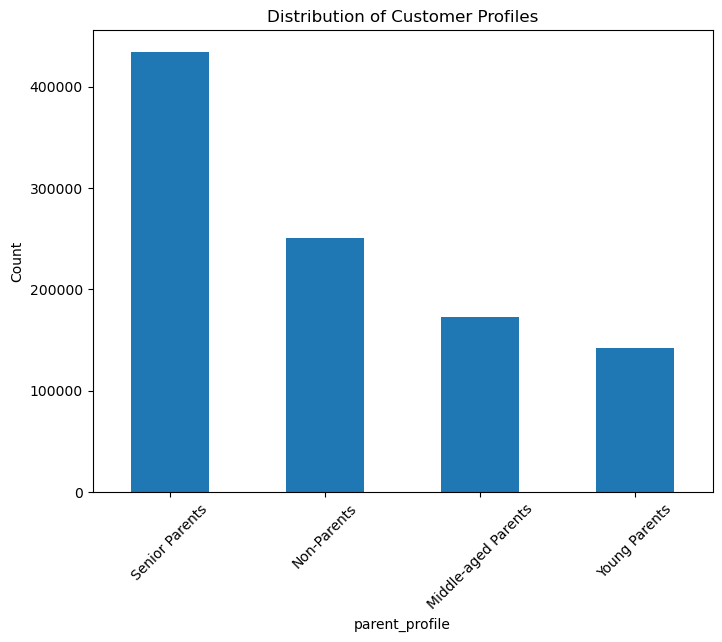

In [22]:
#Create an appropriate visualization to show the distribution of profiles.
# Count the number of occurrences of each profile
profile_counts = customers_ords_prods_merge['parent_profile'].value_counts()

# Plot the distribution of profiles
plt.figure(figsize=(8, 6))
profile_counts.plot(kind='bar')
plt.title('Distribution of Customer Profiles')
plt.xlabel('parent_profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:



#Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#Min, Max and Mean of the max_order of products bought by each parent group
customers_ords_prods_merge.groupby('parent_profile').agg({'max_order': ['min','max','mean']})

max_order               
                          min max       mean
parent_profile                              
Middle-aged Parents         1  99  30.483160
Non-Parents                 1  99  31.486481
Senior Parents              1  99  30.534278
Young Parents               1  99  30.856327

In [28]:
#Min, Max and Mean of the prices, by each parent profile
customers_ords_prods_merge.groupby('parent_profile').agg({'prices': ['min','max','mean']}).sort_index()

prices                
                       min   max      mean
parent_profile                            
Middle-aged Parents    1.0  24.5  7.833544
Non-Parents            1.0  24.5  7.863378
Senior Parents         1.0  24.5  7.839758
Young Parents          1.0  24.5  7.837348

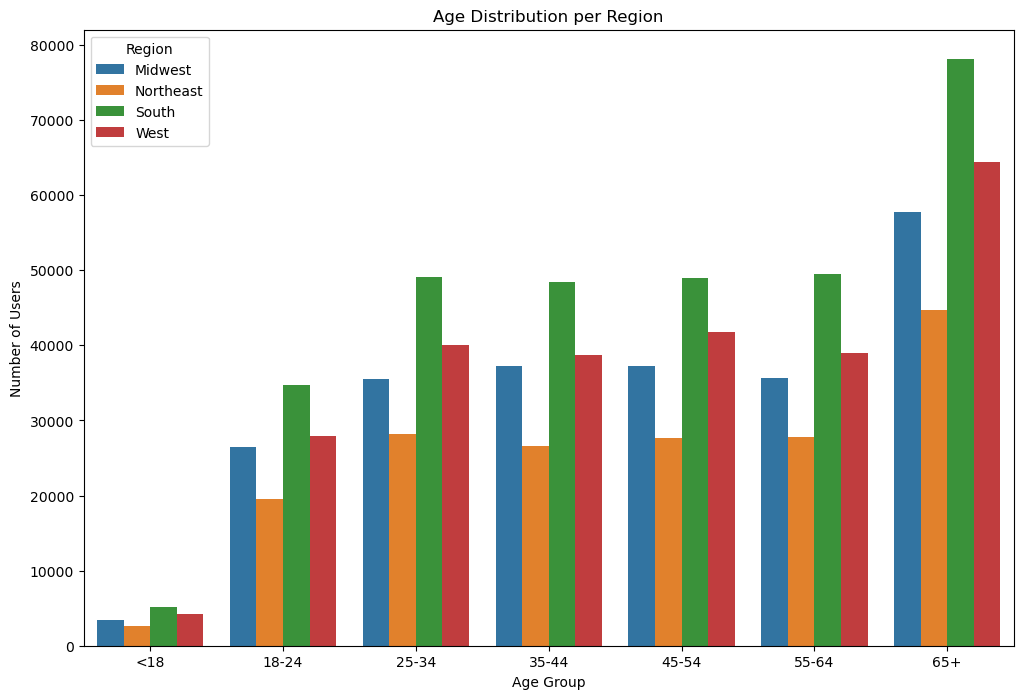

In [29]:
# Define the age groups
age_groups = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on the age values
customers_ords_prods_merge['age_group'] = pd.cut(customers_ords_prods_merge['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')], labels=age_groups)

# Group the data by Region and age_group and count the number of users
grouped_data = customers_ords_prods_merge.groupby(['Region', 'age_group']).size().reset_index(name='count')

# Plot the bar chart showing the age distribution per region
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='count', hue='Region', data=grouped_data)
plt.title('Age Distribution per Region')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Region')
plt.show()

In [34]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region.png'))

<Figure size 640x480 with 0 Axes>

Creating Charts - Products ordered by loyalty groups - Percentages

In [47]:
#Creating a subset with just the 'Midwest' customers
midwest = customers_ords_prods_merge[customers_ords_prods_merge['Region'] == 'Midwest']
#Creating a subset with just the 'West' customers
west = customers_ords_prods_merge[customers_ords_prods_merge['Region'] == 'West']
#Creating a subset with just the 'Northeast' customers
northeast = customers_ords_prods_merge[customers_ords_prods_merge['Region'] == 'Northeast']
#Creating a subset with just the 'South' customers
south = customers_ords_prods_merge[customers_ords_prods_merge['Region'] == 'South']

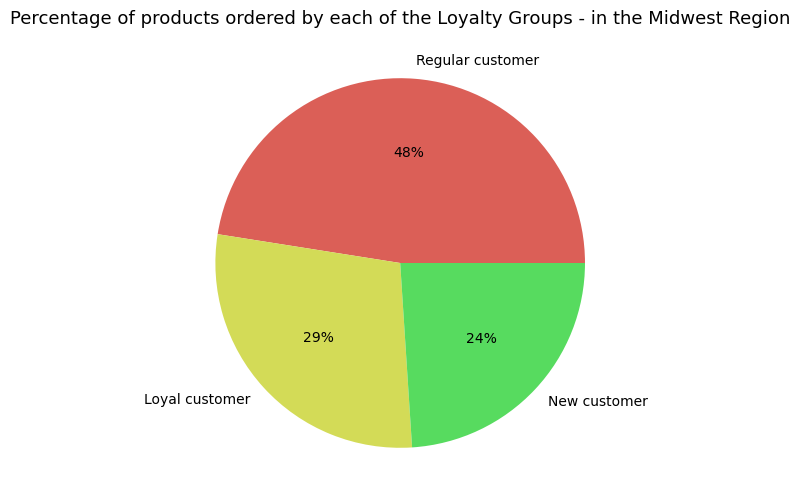

In [48]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the Midwest Region
midwest_loyalty_grp = midwest['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the Midwest Region',fontsize=13)
plt.show()

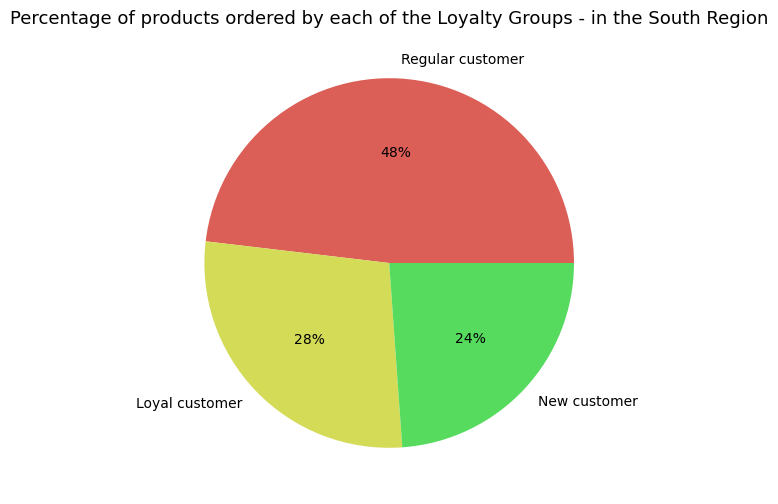

In [49]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the South Region
south_loyalty_grp = south['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the South Region',fontsize=13)
plt.show()

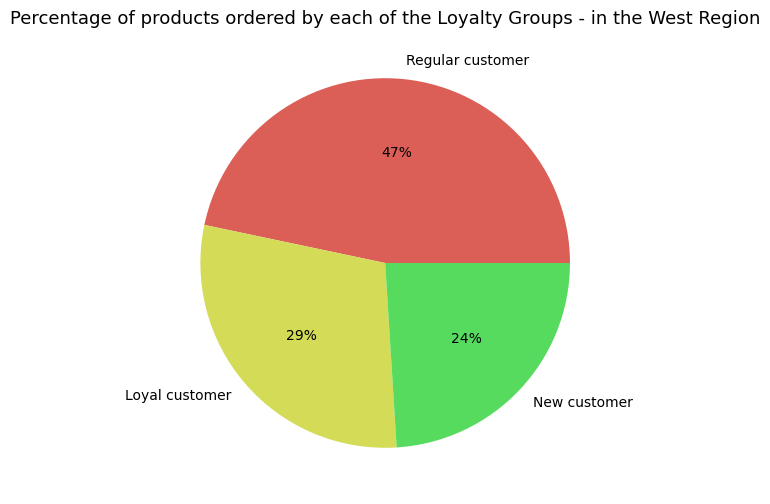

In [50]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the West Region
west_loyalty_grp = west['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the West Region',fontsize=13)
plt.show()

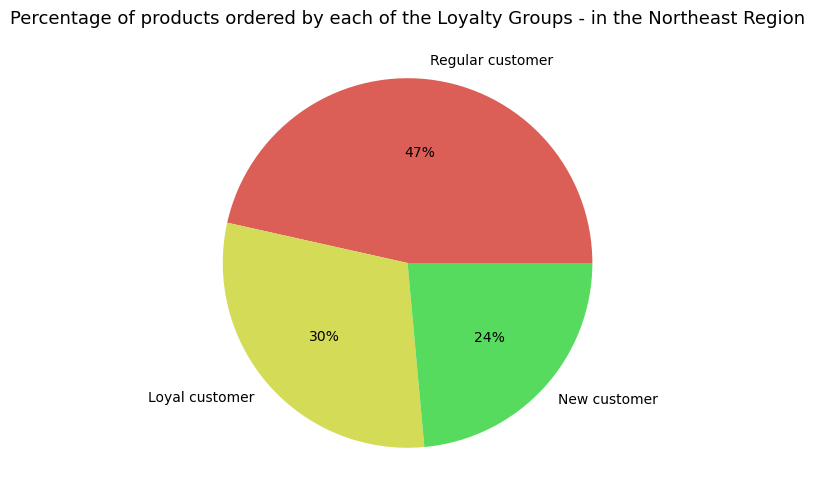

In [51]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the Northeast Region
northeast_loyalty_grp = northeast['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the Northeast Region',fontsize=13)
plt.show()


In [52]:
#Saving images of the 4 pie charts
midwest_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'midwest_loyalty_grp.png'))
south_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'south_loyalty_grp.png'))
west_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'west_loyalty_grp.png'))
northeast_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'northeast_loyalty_grp.png'))

In [53]:
print(low_activity_customers)

        user_id First Name    Surnam  Gender       STATE  Age date_joined  \
0         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
1         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
2         26711    Deborah  Esquivel  Female    Missouri   48  2017-01-01   
3         33890   Patricia      Hart  Female  New Mexico   36  2017-01-01   
4         33890   Patricia      Hart  Female  New Mexico   36  2017-01-01   
...         ...        ...       ...     ...         ...  ...         ...   
999993   122741       Carl     Weber    Male    Michigan   24  2020-04-01   
999996   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999997   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999998   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   
999999   135902      Doris  Richmond  Female    Missouri   66  2020-04-01   

        n_dependants fam_status  income  ...  _merge        price_range  \


In [57]:
removed_count = len(customers_ords_prods_merge) - len(low_activity_customers)

In [58]:
print( removed_count)

78667


In [60]:
print ('parent_profile')

parent_profile


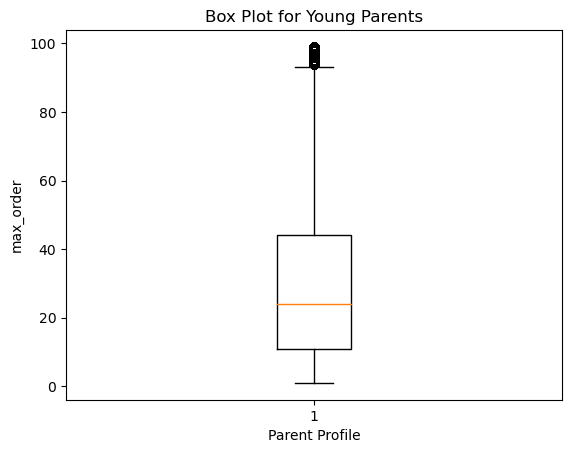

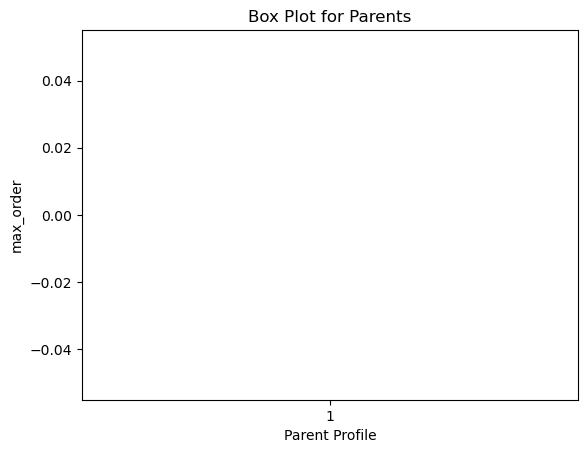

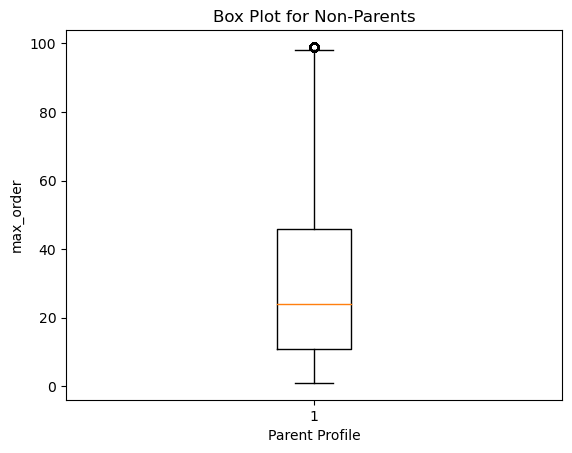

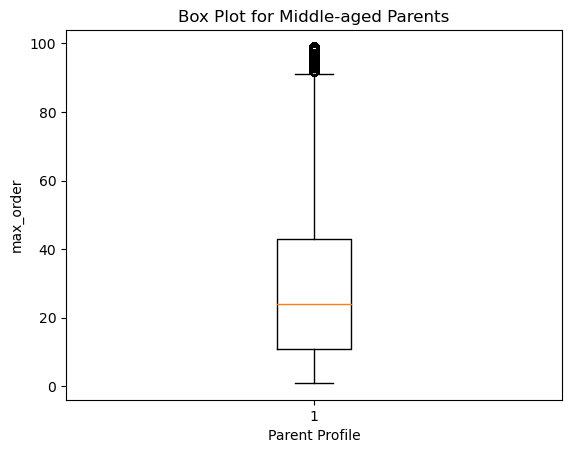

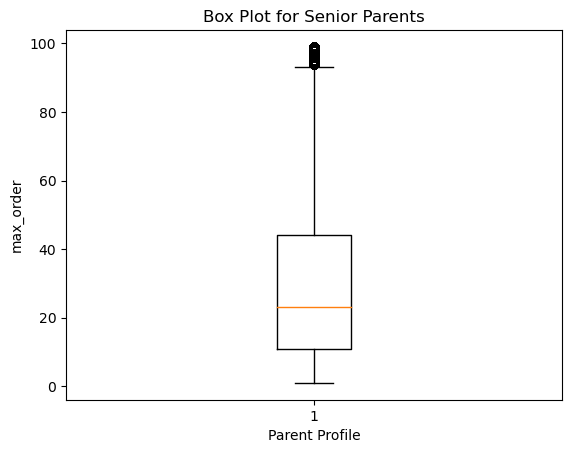

In [66]:
parent_profiles = ['Young Parents', 'Parents', 'Non-Parents', 'Middle-aged Parents', 'Senior Parents']


for profile in parent_profiles:
    plt.figure()  
    plt.boxplot(customers_ords_prods_merge[customers_ords_prods_merge['parent_profile'] == profile]['max_order'])
    plt.title(f"Box Plot for {profile}")
    plt.xlabel("Parent Profile")
    plt.ylabel('max_order')
    plt.show()

In [71]:
customers_ords_prods_merge['parent_profile'].value_counts()


Senior Parents         433823
Non-Parents            251169
Middle-aged Parents    173249
Young Parents          141759
Name: parent_profile, dtype: int64